In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the Data

In [2]:
df=pd.read_excel(r'DATA.xlsx')
Features = df.columns[0:8]  
target = df.columns[9]  

In [3]:
target

'ANT'

In [4]:
X = df[Features]
y = df[target]

# Split the data

# Correlation Matrix 

<AxesSubplot:>

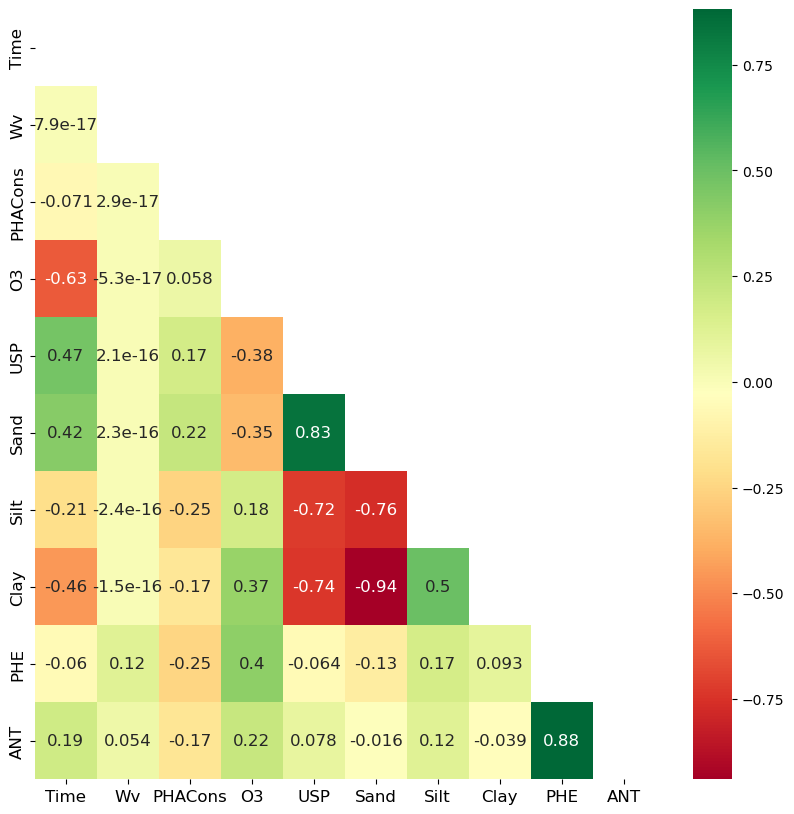

In [5]:
import seaborn as sns
c_matrix=df.copy()
mask=np.zeros_like(c_matrix.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

corrmat = c_matrix.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plot heat map
sns.heatmap(c_matrix[top_corr_features].corr(),mask=mask, annot=True,annot_kws={'size':12}, cmap="RdYlGn")

# MultiLeanear Regression

In [6]:
from sklearn import linear_model
ML_REG = linear_model.LinearRegression()

In [7]:
for rs in [75]:
    print('rs = ', rs)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =rs) 

    Xtrain=np.asanyarray(X_train[['Time', 'Wv', 'PHACons', 'O3', 'USP', 'Sand', 'Silt', 'Clay']])
    ytrain=np.asanyarray(y_train)

    Xtest=np.asanyarray(X_test[['Time', 'Wv', 'PHACons', 'O3', 'USP', 'Sand', 'Silt', 'Clay']])
    ytest=np.asanyarray(y_test)
    
    MLR=ML_REG.fit(Xtrain, ytrain)
    ypred_train=MLR.predict(Xtrain)
    r2_train = r2_score(ytrain, ypred_train)
    print('R2_train = ', r2_train)
    joblib.dump(MLR, 'MLR.sav')
    ypred_test=MLR.predict(Xtest)
    r2_test = r2_score(ytest, ypred_test)
    print('R2_test = ', r2_test)
    print('----------------------------------------------------')
    
    

rs =  75
R2_train =  0.33264103586919325
R2_test =  0.17352704438597677
----------------------------------------------------


# Gradient Boosting Regression

In [1]:
from sklearn.ensemble import GradientBoostingRegressor as GB

In [9]:
for rs in [194]:           #[35,39,75]
    print(rs)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =rs) 
    CrossValidationNum=10

    X_train.to_csv('X_train_GBR.csv', index=False)
    X_test.to_csv('X_test_GBR.csv', index=False)

    y_train.to_csv('y_train_GBR.csv', index=False)
    y_test.to_csv('y_test_GBR.csv', index=False)


    param_grid = {'loss' :['squared_error'],
                        'learning_rate' : [0.17],
                        'n_estimators' :[250],
                        'subsample' : [1.0],
                        'criterion' : ['friedman_mse'],
                        'min_samples_split' : [2,3],
                        'min_samples_leaf' : [2,3],
                        'min_weight_fraction_leaf' : [0],
                        'max_depth' : [4],
                        'min_impurity_decrease': [0],
                        'max_features': [1],
                        'verbose' : [0],
                        'random_state':[10],
                        'max_leaf_nodes' : [5],
                        'tol': [0],
                        'ccp_alpha' : [.05]}
       
    gs = GridSearchCV( GB(), 
                  param_grid = param_grid, 
                  scoring = 'r2', 
                  n_jobs = -1,
                  cv = CrossValidationNum,
                  verbose = 1, 
                  refit = True)
    gs= gs.fit(X_train, y_train)

    estimator = GB(
                    loss = gs.best_params_['loss'],
                    learning_rate = gs.best_params_['learning_rate'],
                    n_estimators = gs.best_params_['n_estimators'],
                    subsample = gs.best_params_['subsample'],
                    criterion = gs.best_params_['criterion'],
                    min_samples_split = gs.best_params_['min_samples_split'],
                    min_samples_leaf = gs.best_params_['min_samples_leaf'],
                    min_weight_fraction_leaf = gs.best_params_['min_weight_fraction_leaf'],
                    max_depth = gs.best_params_['max_depth'],
                    min_impurity_decrease = gs.best_params_['min_impurity_decrease'],
                    max_features = gs.best_params_['max_features'],
                    verbose = gs.best_params_['verbose'],
                    max_leaf_nodes = gs.best_params_['max_leaf_nodes'],
                    tol = gs.best_params_['tol'],
                    random_state=gs.best_params_['random_state'],
                    ccp_alpha = gs.best_params_['ccp_alpha'])
    
    estimator.fit(X_train, y_train)

    CV5_r2 = cross_val_score(estimator,  X_train, y_train, cv = CrossValidationNum, scoring ='r2').mean()

    ypred_train = estimator.predict(X_train)
    r2_train = r2_score(y_train, ypred_train)
    mse_train = mean_squared_error(y_train, ypred_train)
    
    ypred_test = estimator.predict(X_test)
    r2_test = r2_score(y_test, ypred_test)
    mse_test = mean_squared_error(y_test, ypred_test)
    joblib.dump(estimator, 'GBR.sav')

    print('Complete')
    print(estimator)
    print('R2_Train',r2_train.round(3))
    print('R2_Test',r2_test.round(3))
    print('CV5_R2_Train',CV5_r2 .round(3))
    print('------------------------------------')

194
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Complete
GradientBoostingRegressor(ccp_alpha=0.05, learning_rate=0.17, max_depth=4,
                          max_features=1, max_leaf_nodes=5,
                          min_impurity_decrease=0, min_samples_leaf=3,
                          min_weight_fraction_leaf=0, n_estimators=250,
                          random_state=10, tol=0)
R2_Train 0.981
R2_Test 0.821
CV5_R2_Train 0.807
------------------------------------


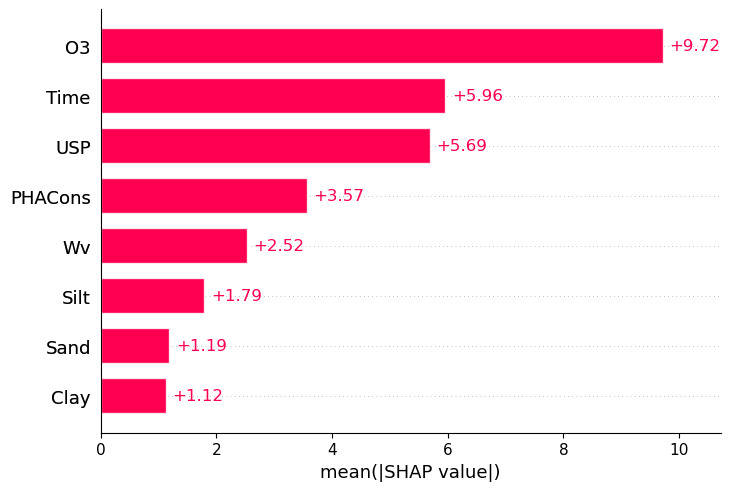

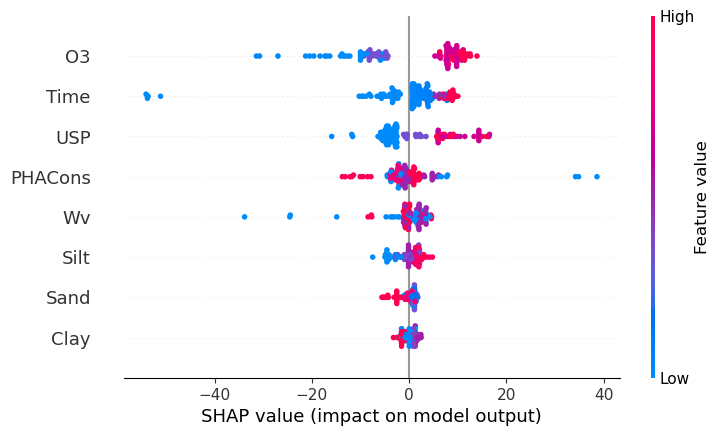

In [10]:
import shap
estimator_GBR = joblib.load('GBR.sav')
explainer = shap.Explainer(estimator_GBR, seed = 1, algorithm ='tree')

shap_values = explainer(X_train) 
ax=shap.plots.bar(shap_values, max_display=12, order=shap.Explanation.abs, show=True)
ax1=shap.plots.beeswarm(shap_values, max_display=10)


# Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor as RF

In [13]:
for rs in [75]:
    print('rs= ', rs)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =rs) 
    CrossValidationNum=10
    X_train.to_csv('X_train_RFR.csv', index=False)
    X_test.to_csv('X_test_RFR.csv', index=False)
    y_train.to_csv('y_train_RFR.csv', index=False)
    y_test.to_csv('y_test_RFR.csv', index=False)    
    
    param_grid = {  'n_estimators' :[200,220],
                        'criterion' : ['squared_error'],
                        'min_samples_split' : [2],
                        'min_samples_leaf' : [2,3],
                        'min_weight_fraction_leaf' : [0.0],
                        'max_features' :[1],
                        'max_leaf_nodes' : [15,20,25],
                        'min_impurity_decrease' :[ 0.0],
                        'n_jobs' : [-1],
                        'random_state' : [10],
                        'ccp_alpha' :[0]}
    
    gs = GridSearchCV( RF(), 
                      param_grid = param_grid, 
                      scoring = 'r2', 
                      n_jobs = -1,
                      cv = CrossValidationNum,
                      verbose = 2, 
                      refit = True)
    gs = gs.fit(X_train, y_train)
    
    estimator = RF( n_estimators=gs.best_params_['n_estimators'],
                        criterion=gs.best_params_['criterion'],
                        min_samples_split=gs.best_params_['min_samples_split'],
                        min_samples_leaf=gs.best_params_['min_samples_leaf'],
                        min_weight_fraction_leaf=gs.best_params_['min_weight_fraction_leaf'],
                        max_features=gs.best_params_['max_features'],
                        max_leaf_nodes=gs.best_params_['max_leaf_nodes'],
                        min_impurity_decrease=gs.best_params_['min_impurity_decrease'],
                        random_state=gs.best_params_['random_state'],
                        n_jobs=gs.best_params_['n_jobs'],
                        ccp_alpha=gs.best_params_['ccp_alpha'])
    
    estimator.fit(X_train, y_train)
    joblib.dump(estimator, 'RFR.sav')
    CV5_r2 = cross_val_score(estimator,  X_train, y_train, cv = CrossValidationNum, scoring ='r2').mean()

    
    y_fpred_train = estimator.predict(X_train)
    f_r2_train = r2_score(y_train, y_fpred_train)
    f_mse_train = mean_squared_error(y_train, y_fpred_train)
    
    y_fpred_test = estimator.predict(X_test)
    f_r2_test = r2_score(y_test, y_fpred_test)
    f_mse_test = mean_squared_error(y_test, y_fpred_test)
    
    print(estimator)
    print('R2_Train',f_r2_train.round(3))
    print('R2_Test',f_r2_test.round(3))
    print('CV5_R2_Train',CV5_r2 .round(3))
    print('--------------------------------------')

rs=  75
Fitting 10 folds for each of 12 candidates, totalling 120 fits
RandomForestRegressor(ccp_alpha=0, max_features=1, max_leaf_nodes=25,
                      min_samples_leaf=2, n_estimators=200, n_jobs=-1,
                      random_state=10)
R2_Train 0.617
R2_Test 0.412
CV5_R2_Train 0.363
--------------------------------------


In [14]:
estimator

RandomForestRegressor(ccp_alpha=0, max_features=1, max_leaf_nodes=25,
                      min_samples_leaf=2, n_estimators=200, n_jobs=-1,
                      random_state=10)

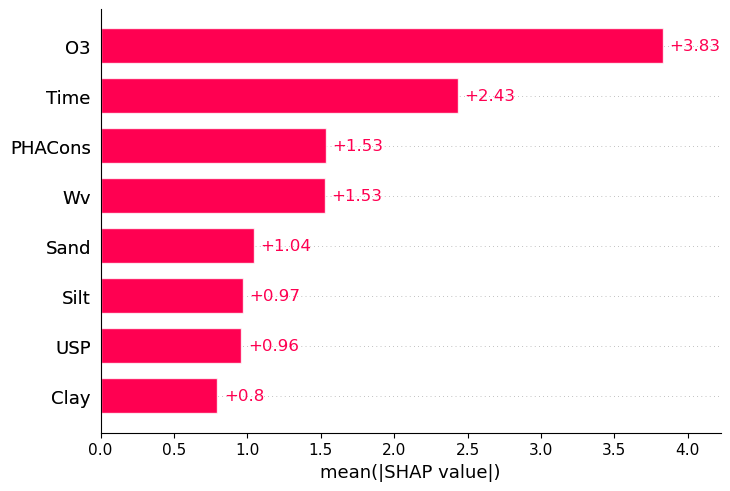

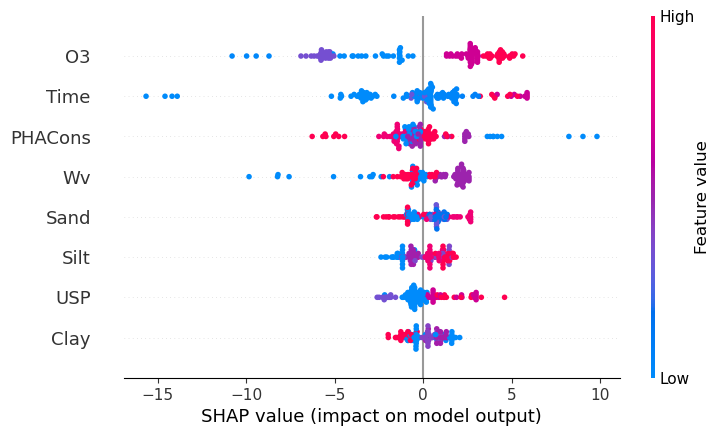

In [15]:
import shap
estimator_RFR = joblib.load('RFR.sav')
explainer = shap.Explainer(estimator_RFR, seed = 1, algorithm ='tree')

shap_values = explainer(X_train) 
ax=shap.plots.bar(shap_values, max_display=12, order=shap.Explanation.abs, show=True)
ax1=shap.plots.beeswarm(shap_values, max_display=10)

# Xtream Gradient Boosting

In [16]:
from xgboost import XGBRegressor as XGBR

In [17]:
for rs in [79]:      #[79,83,2]
    print('rs= ', rs)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =rs) 
    CrossValidationNum=10
    X_train.to_csv('X_train_XGBR.csv', index=False)
    X_test.to_csv('X_test_XGBR.csv', index=False)
    y_train.to_csv('y_train_XGBR.csv', index=False)
    y_test.to_csv('y_test_XGBR.csv', index=False)   
    
    
    param_grid = {'learning_rate' : [0.035],
                  'n_estimators' :[250],
                  'max_depth' :[6],
                  'n_jobs'  : [-1],
                  'reg_alpha' :[0.175,0.18,0.185, 0.19],
                  'reg_lambda' : [0.035,0.04,0.05],
                  'predictor' : ['cpu_predictor']}
    gs = GridSearchCV(XGBR(), 
                      param_grid = param_grid, 
                      scoring = 'r2', 
                      n_jobs = -1,
                      cv = CrossValidationNum,
                      verbose = 1, 
                      refit = True)
    gs = gs.fit(X_train, y_train)
                  
    estimator =XGBR(    learning_rate=gs.best_params_['learning_rate'],
                        n_estimators=gs.best_params_['n_estimators'],
                        max_depth=gs.best_params_['max_depth'],
                        n_jobs=gs.best_params_['n_jobs'],
                        reg_alpha=gs.best_params_['reg_alpha'],
                        reg_lambda=gs.best_params_['reg_lambda'],
                        predictor=gs.best_params_['predictor'])
    
    estimator.fit(X_train, y_train)
    joblib.dump(estimator, 'XGBR.sav')
    CV5_r2 = cross_val_score(estimator,  X_train, y_train, cv = CrossValidationNum, scoring ='r2').mean()
    y_fpred_train = estimator.predict(X_train)
    f_r2_train = r2_score(y_train, y_fpred_train)
    f_mse_train = mean_squared_error(y_train, y_fpred_train)
    
    y_fpred_test = estimator.predict(X_test)
    f_r2_test = r2_score(y_test, y_fpred_test)
    f_mse_test = mean_squared_error(y_test, y_fpred_test)
    
    print(estimator)
    print('R2_Train',f_r2_train.round(3))
    print('R2_Test',f_r2_test.round(3))
    print('CV5_R2_Train',CV5_r2 .round(3))
    print('--------------------------------------')                 
    

rs=  79
Fitting 10 folds for each of 12 candidates, totalling 120 fits
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.035, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=250, n_jobs=-1,
             num_parallel_tree=1, predictor='cpu_predictor', random_state=0,
             reg_alpha=0.185, reg_lambda=0.04, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
R2_Train 0.999
R2_Test 0.865
CV5_R2_Train 0.835
--------------------------------------


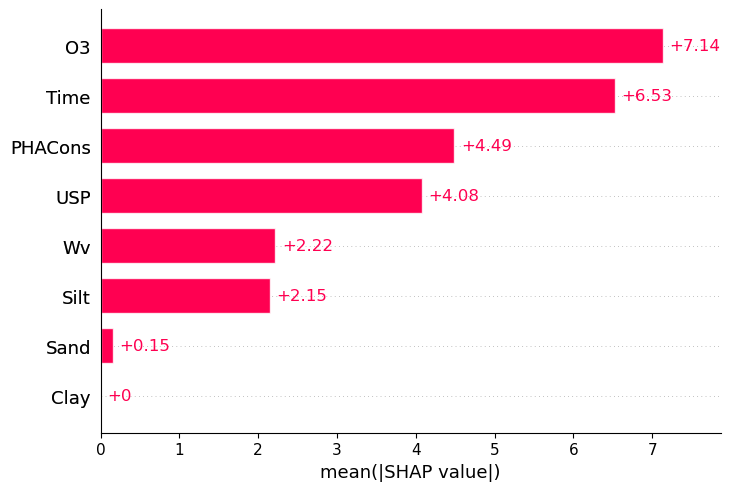

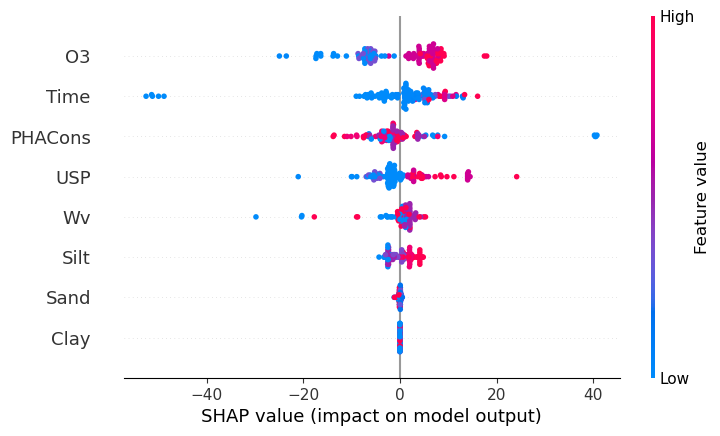

In [18]:
import shap
estimator_XGBR = joblib.load('XGBR.sav')
explainer = shap.Explainer(estimator_XGBR, seed = 1, algorithm ='tree')

shap_values = explainer(X_train) 
ax=shap.plots.bar(shap_values, max_display=12, order=shap.Explanation.abs, show=True)
ax1=shap.plots.beeswarm(shap_values, max_display=10)

In [19]:
estimator_MLR = joblib.load('MLR.sav')
estimator_GBR = joblib.load('GBR.sav')
estimator_RFR = joblib.load('RFR.sav')
estimator_XGBR = joblib.load('XGBR.sav')

In [16]:
df

Time   Wv  PHACons    O3  USP   Sand   Silt   Clay    PHE    ANT
0       4  200    262.5  2.80    0  13.79  66.44  19.77  83.80  60.30
1       4  400    262.5  2.80    0  13.79  66.44  19.77  79.90  45.50
2       6  300    135.0  4.15    0  13.79  66.44  19.77  89.60  49.10
3       4  200      7.5  2.80    0  13.79  66.44  19.77  99.99  99.99
4       4  200    262.5  2.80    0  13.79  66.44  19.77  82.60  59.80
..    ...  ...      ...   ...  ...    ...    ...    ...    ...    ...
145     4  200    350.0  5.50  195  42.93  51.43   5.63  92.07  70.43
146     2  100    350.0  4.15  290  42.93  51.43   5.63  72.60  50.76
147     6  300    350.0  1.45  290  42.93  51.43   5.63  61.87  39.49
148     2  100    350.0  1.45  100  42.93  51.43   5.63  42.24  20.82
149     4  200    350.0  2.80  195  42.93  51.43   5.63  75.03  53.61

[150 rows x 10 columns]

In [20]:
df['MLR']=estimator_MLR.predict(df[Features]).round(2)
df['RFR']=estimator_RFR.predict(df[Features]).round(2)
df['GBR']=estimator_GBR.predict(df[Features]).round(2)
df['XGBR']=estimator_XGBR.predict(df[Features]).round(2)
df.head(50)

Time   Wv  PHACons    O3  USP   Sand   Silt   Clay    PHE    ANT    MLR  \
0      4  200    262.5  2.80    0  13.79  66.44  19.77  83.80  60.30  52.59   
1      4  400    262.5  2.80    0  13.79  66.44  19.77  79.90  45.50  55.06   
2      6  300    135.0  4.15    0  13.79  66.44  19.77  89.60  49.10  67.94   
3      4  200      7.5  2.80    0  13.79  66.44  19.77  99.99  99.99  56.98   
4      4  200    262.5  2.80    0  13.79  66.44  19.77  82.60  59.80  52.59   
5      4  200    262.5  2.80    0  13.79  66.44  19.77  83.40  60.80  52.59   
6      6  100    135.0  1.45    0  13.79  66.44  19.77  76.10  43.60  43.41   
7      0  200    262.5  2.80    0  13.79  66.44  19.77   0.00   0.00  50.81   
8      2  300    135.0  4.15    0  13.79  66.44  19.77  83.70  52.70  66.16   
9      6  100    135.0  4.15    0  13.79  66.44  19.77  91.70  52.40  65.47   
10     4  200    517.5  2.80    0  13.79  66.44  19.77  91.70  68.60  48.20   
11     2  300    390.0  1.45    0  13.79  66.44  19.77  57.90  40.80  39.71   
12     6  300    390.0  1.45    0  13.79  66.44  19.77  60.50  51.70  41.49   
13     6  300    390.0  4.15    0  13.79  66.44  19.77  74.20  66.70  63.55   
14     2  300    135.0  1.45    0  13.79  66.44  19.77  64.00  35.00  44.10   
15     2  100    390.0  1.45    0  13.79  66.44  19.77  61.10  43.50  37.24   
16     6  100    390.0  4.15    0  13.79  66.44  19.77  77.10  68.40  61.08   
17     2  100    390.0  4.15    0  13.79  66.44  19.77  75.30  62.00  59.30   
18     4    0    262.5  2.80    0  13.79  66.44  19.77  28.30  27.90  50.12   
19     2  100    135.0  4.15    0  13.79  66.44  19.77  85.70  54.50  63.69   
20     2  100    135.0  1.45    0  13.79  66.44  19.77  64.40  38.00  41.63   
21     4  200    262.5  2.80    0  13.79  66.44  19.77  83.00  59.90  52.59   
22     6  300    135.0  1.45    0  13.79  66.44  19.77  72.90  38.00  45.88   
23     4  200    262.5  0.10    0  13.79  66.44  19.77  31.80   8.80  30.52   
24     4  200    262.5  5.50    0  13.79  66.44  19.77  96.30  73.80  74.66   
25     6  100    390.0  1.45    0  13.79  66.44  19.77  63.80  53.40  39.02   
26     8  200    262.5  2.80    0  13.79  66.44  19.77  97.30  74.50  54.37   
27     4  200    262.5  2.80    0  13.79  66.44  19.77  82.30  59.40  52.59   
28     4  200    262.5  2.80    0  13.79  66.44  19.77  82.50  60.20  52.59   
29     2  300    390.0  4.15    0  13.79  66.44  19.77  73.00  58.00  61.77   
30     4  200    262.5  2.80    0   8.26  59.18  32.56  75.66  52.49  44.43   
31     4  400    262.5  2.80    0   8.26  59.18  32.56  69.31  37.55  46.90   
32     6  300    135.0  4.15    0   8.26  59.18  32.56  81.62  41.13  59.79   
33     4  200      7.5  2.80    0   8.26  59.18  32.56  92.08  92.85  48.82   
34     4  200    262.5  2.80    0   8.26  59.18  32.56  74.71  51.90  44.43   
35     4  200    262.5  2.80    0   8.26  59.18  32.56  75.04  53.75  44.43   
36     6  100    135.0  1.45    0   8.26  59.18  32.56  68.07  35.89  35.25   
37     0  200    262.5  2.80    0   8.26  59.18  32.56   0.00   0.00  42.65   
38     2  300    135.0  4.15    0   8.26  59.18  32.56  75.87  44.91  58.01   
39     6  100    135.0  4.15    0   8.26  59.18  32.56  83.11  44.41  57.32   
40     4  200    517.5  2.80    0   8.26  59.18  32.56  83.49  61.30  40.04   
41     2  300    390.0  1.45    0   8.26  59.18  32.56  49.80  33.48  31.55   
42     6  300    390.0  1.45    0   8.26  59.18  32.56  52.74  44.12  33.33   
43     6  300    390.0  4.15    0   8.26  59.18  32.56  66.32  59.55  55.40   
44     2  300    135.0  1.45    0   8.26  59.18  32.56  55.74  27.75  35.94   
45     2  100    390.0  1.45    0   8.26  59.18  32.56  52.44  35.51  29.08   
46     6  100    390.0  4.15    0   8.26  59.18  32.56  68.84  60.55  52.93   
47     2  100    390.0  4.15    0   8.26  59.18  32.56  67.01  54.00  51.15   
48     4    0    262.5  2.80    0   8.26  59.18  32.56  20.48  19.92  41.97   
49     2  100    135.0  4.15    0   8.26  59.18  32.56

In [21]:
y_fpred = estimator.predict(X_test)
MSE_MLR = mean_squared_error(df['PHE'], df['MLR']).round(2)
MSE_RFR = mean_squared_error(df['PHE'], df['RFR']).round(2)
MSE_GBR = mean_squared_error(df['PHE'], df['GBR']).round(2)
MSE_XGBR = mean_squared_error(df['PHE'], df['XGBR']).round(2)
print('MSE_MLR = ', MSE_MLR)
print('MSE_RFR = ', MSE_RFR)
print('MSE_GBR = ', MSE_GBR)
print('MSE_XGBR = ', MSE_XGBR)

MSE_MLR =  707.2
MSE_RFR =  616.39
MSE_GBR =  453.24
MSE_XGBR =  414.73


# Ploting Dataframe

In [22]:
df_col=df.columns

In [72]:
df_col

Index(['Time', 'Wv', 'PHACons', 'O3', 'USP', 'Sand', 'Silt', 'Clay', 'PHE',
       'ANT'],
      dtype='object')

In [23]:
ddf=df.describe()

In [24]:
import matplotlib.gridspec as gridspec

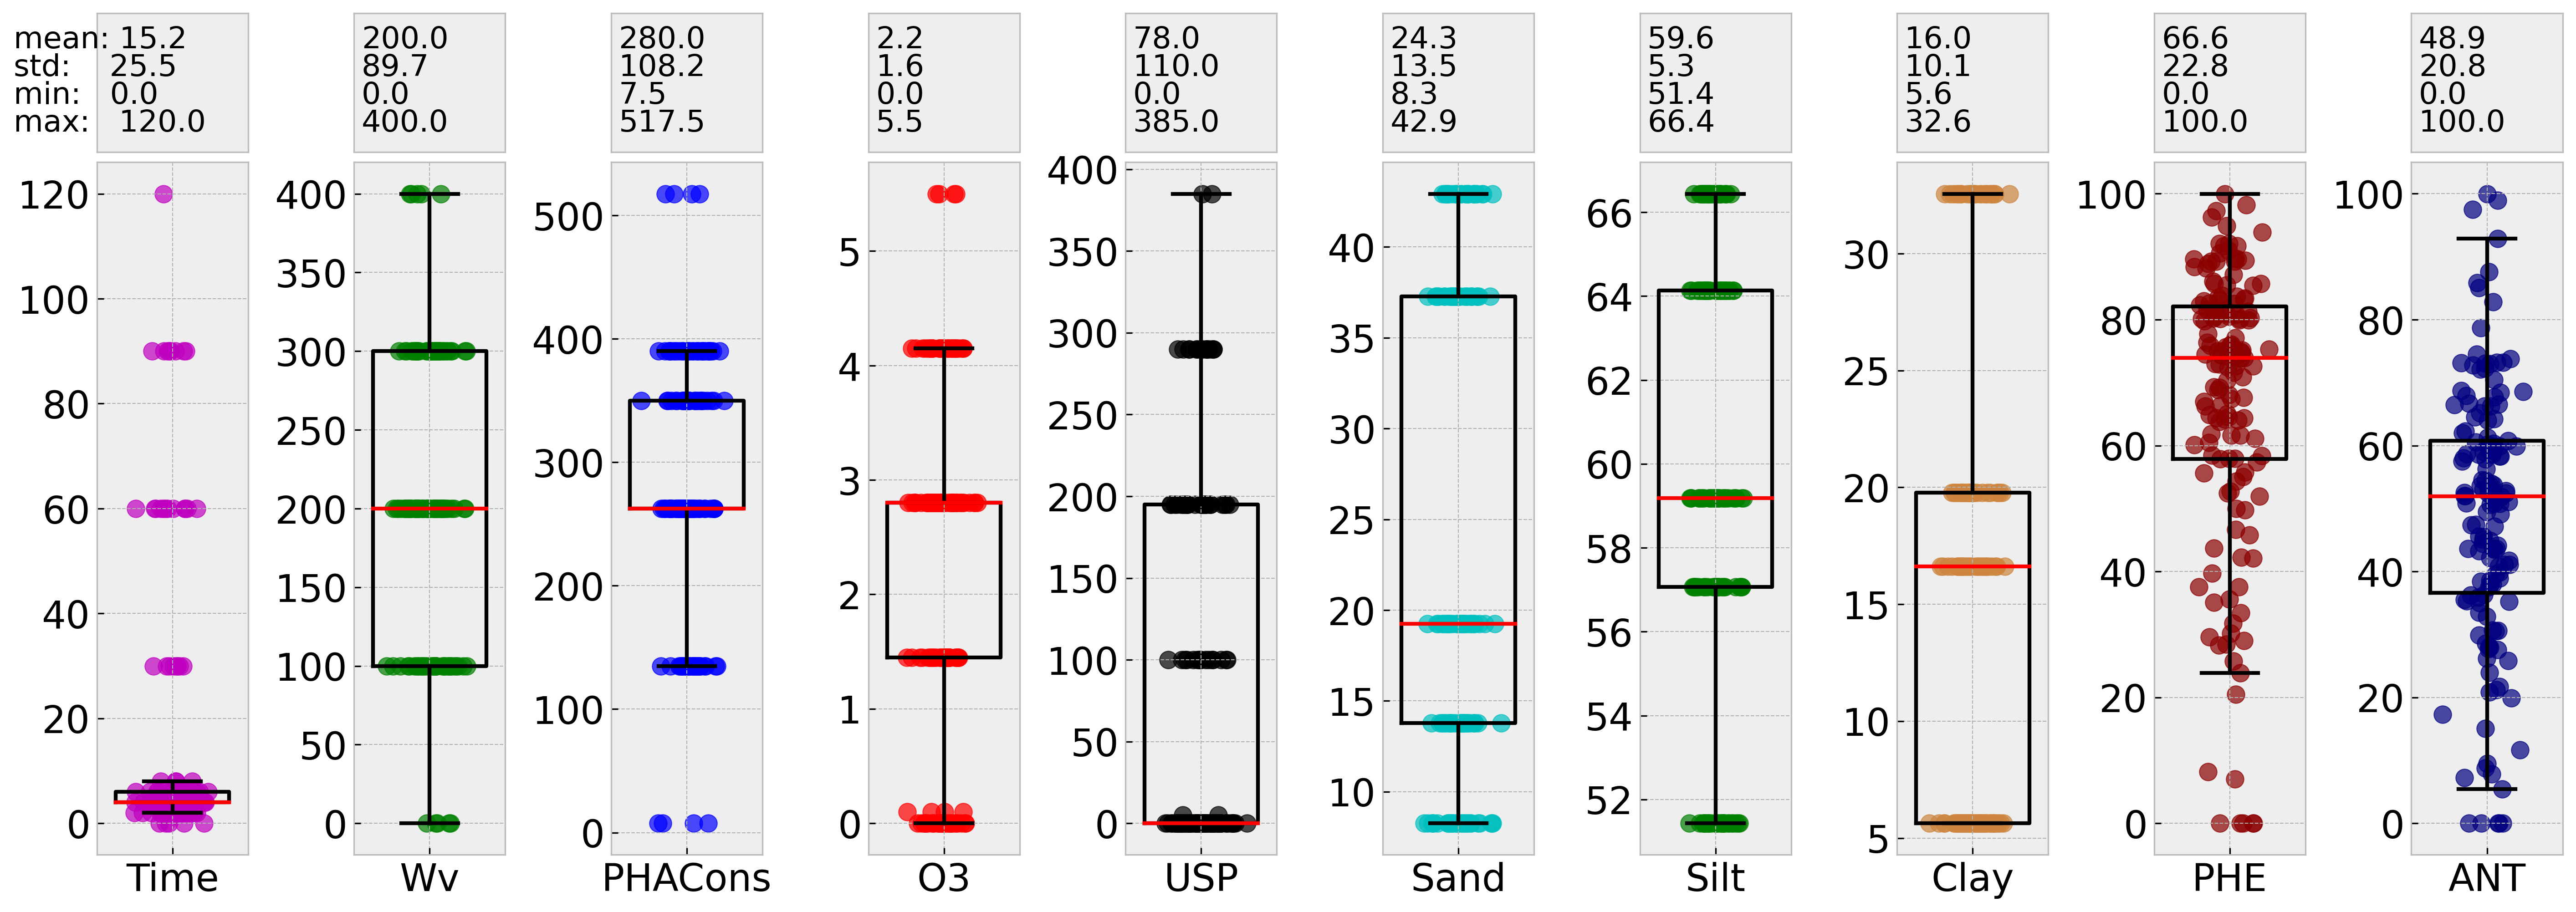

In [75]:
plt.style.use('bmh')   # default

font1 = {'family':'serif','color':'black'}
font2 = {'family':'serif','color':'darkred'}

# Set the default text font size
plt.rc('font', size=20)
# Set the fig title font size
plt.rc('axes', titlesize=20)
# Set the axes labels font size
plt.rc('axes', labelsize=20)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=20)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=20)
# Set the legend font size
plt.rc('legend', fontsize=20)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

fig = plt.figure(figsize=(50,8), dpi=300)
gs  = gridspec.GridSpec(2, 21, wspace=0.7, hspace=0.025, height_ratios=[0.2, 1])

cl=['m', 'g', 'b', 'r', 'k', 'c', 'green', 'peru', 'darkred', 'navy', 
       'k', 'indigo', 'teal', 'silver', 'skyblue', 'gold', 'brown', 'lime', 'darkblue', 'olive', 'purple']
j=0
for col in df_col:
    ax = fig.add_subplot(gs[1,j])
    ax=plt.boxplot(df[col], widths=.75, labels=[col], meanline =True,vert=True,
                showfliers = False,
                medianprops = {"color": "r", "linewidth": 2},
                boxprops = {"color": "k", "linewidth": 2},
                whiskerprops = {"color": "k", "linewidth": 2},
                capprops = {"color": "k", "linewidth": 2})
    
    xs, names = [], []
    vals=np.asanyarray(df[col])
    names.append(col)
    xs.append(np.random.normal(1, 0.1, len(df[col])))
    ax=plt.scatter(xs,df[col], alpha= 0.7, marker='o', s=85, color=cl[j])
    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
    
    
    ax1 = fig.add_subplot(gs[0,j])
    if j==0:
        text_mean=  'mean: ' + str(ddf[col]['mean'].round(1))
        text_std=   'std:    ' + str(ddf[col]['std'].round(1))
        text_min=  'min:   ' + str(ddf[col]['min'].round(1))
        text_max=  'max:   ' + str(ddf[col]['max'].round(1))
        ax1=plt.text(-.55, 0.75, text_mean, fontsize = 16)
        ax1=plt.text(-.55, 0.55, text_std, fontsize = 16)
        ax1=plt.text(-.55, 0.35, text_min, fontsize = 16)
        ax1=plt.text(-.55, 0.15, text_max, fontsize = 16)
    else :
        text_mean= str(ddf[col]['mean'].round(1))
        text_std= str(ddf[col]['std'].round(1))
        text_min= str(ddf[col]['min'].round(1))
        text_max= str(ddf[col]['max'].round(1))            
        ax1=plt.text(0.05, 0.75, text_mean, fontsize = 16)
        ax1=plt.text(0.05, 0.55, text_std, fontsize = 16)
        ax1=plt.text(0.05, 0.35, text_min, fontsize = 16)
        ax1=plt.text(0.05, 0.15, text_max, fontsize = 16)

    plt.yticks([])
    plt.xticks([])
    j=j+1


In [25]:
X_train_RFR=pd.read_csv('X_train_RFR.csv')
X_train_GBR=pd.read_csv('X_train_GBR.csv')
X_train_XGBR=pd.read_csv('X_train_XGBR.csv')

X_test_RFR=pd.read_csv('X_test_RFR.csv')
X_test_GBR=pd.read_csv('X_test_GBR.csv')
X_test_XGBR=pd.read_csv('X_test_XGBR.csv')



y_train_RFR=pd.read_csv('y_train_RFR.csv')
y_train_GBR=pd.read_csv('y_train_GBR.csv')
y_train_XGBR=pd.read_csv('y_train_XGBR.csv')

y_test_RFR=pd.read_csv('y_test_RFR.csv')
y_test_GBR=pd.read_csv('y_test_GBR.csv')
y_test_XGBR=pd.read_csv('y_test_XGBR.csv')

y_pred_train_RFR=estimator_RFR.predict(X_train_RFR)
y_pred_test_RFR=estimator_RFR.predict(X_test_RFR)

y_pred_train_GBR=estimator_GBR.predict(X_train_GBR)
y_pred_test_GBR=estimator_GBR.predict(X_test_GBR)

y_pred_train_XGBR=estimator_XGBR.predict(X_train_XGBR)
y_pred_test_XGBR=estimator_XGBR.predict(X_test_XGBR)


# Ploting Features Importance

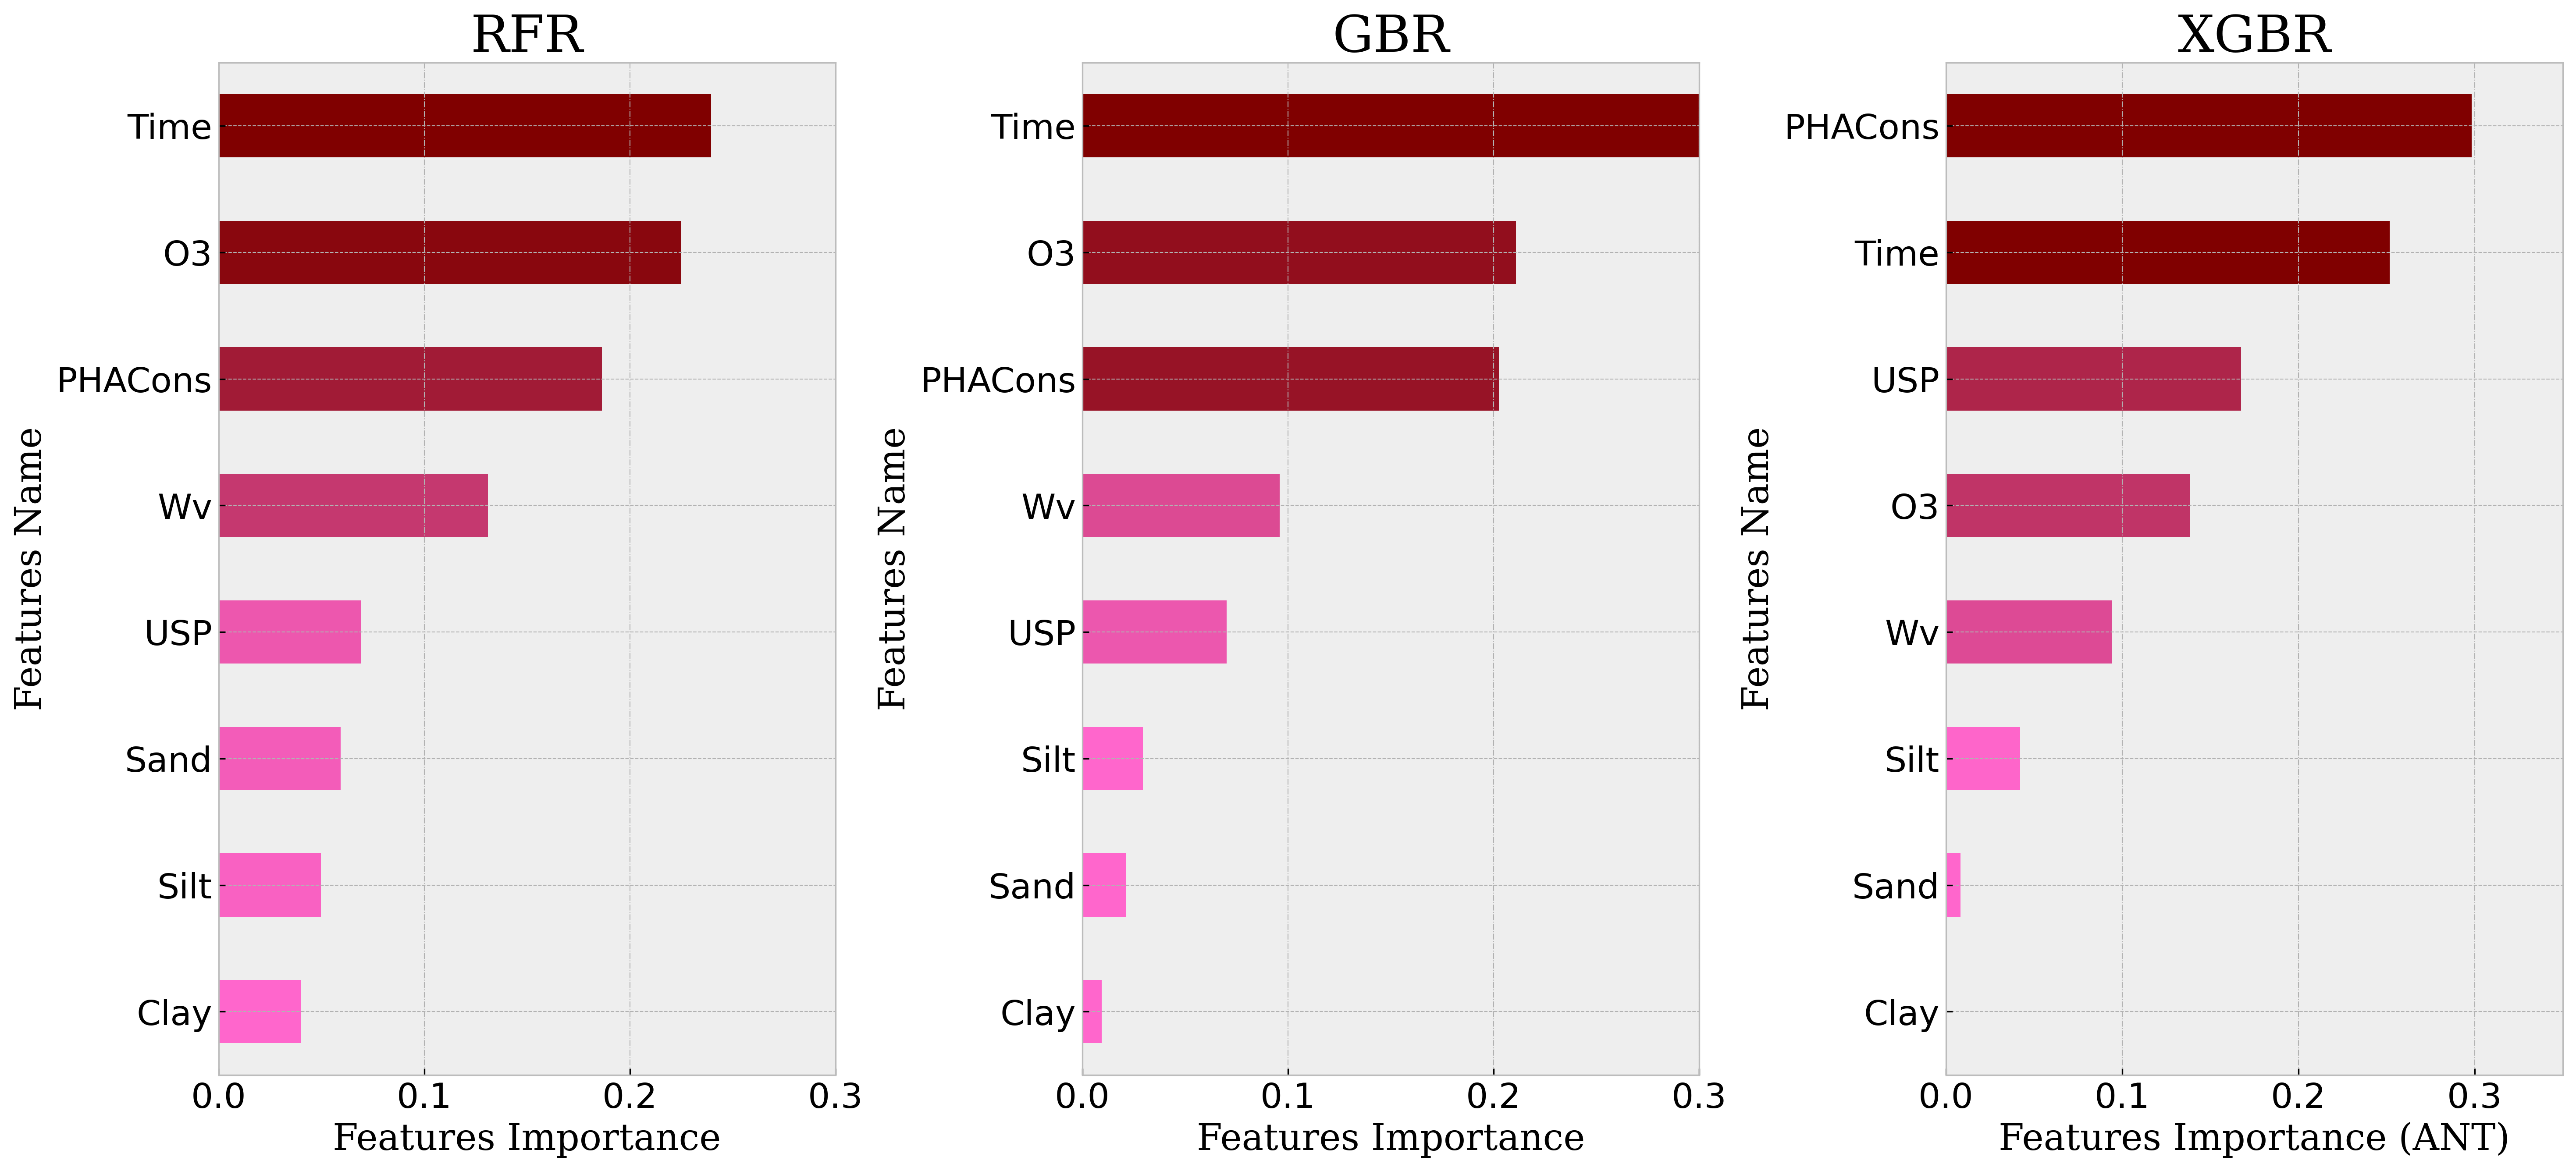

In [34]:
import matplotlib as mp
plt.style.use('bmh')   # default

font1 = {'family':'serif','color':'black'}
font2 = {'family':'serif','color':'darkred'}

# Set the default text font size
plt.rc('font', size=20)
# Set the fig title font size
plt.rc('axes', titlesize=22)
# Set the axes labels font size
plt.rc('axes', labelsize=20)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=19)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=19)
# Set the legend font size
plt.rc('legend', fontsize=18)
# Set the font size of the figure title
plt.rc('figure', titlesize=22)

Models=[estimator_RFR,estimator_GBR,estimator_XGBR]
modelsName=['RFR', 'GBR', 'XGBR']

fig = plt.figure(figsize=(23,10), dpi=300)
gs  = gridspec.GridSpec(1, 3, wspace=0.40, hspace=0.1,
                        width_ratios=[1, 1, 1], height_ratios=[1.5])


data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap("my_map", {"red": [(0, 1.0, 1.0), (1.0, .5, .5)],
                                                         "green": [(0, 0.5, 0.4), (1.0, 0, 0)],
                                                         "blue": [(0, 0.50, 0.8), (1.0, 0, 0)]})


i=0
for model in Models:
    if i==0 or i==1:
        importances=model.feature_importances_
        feature_names = model.feature_names_in_ 
        estimator_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)
    
        ax = fig.add_subplot(gs[0,i])
        color_scores = np.array(estimator_importances)
        ax = estimator_importances.plot.barh(color=color_map(data_normalizer(color_scores)))   

    
        ax.set_title(modelsName[i]  , loc= 'center', fontdict = font1, fontsize=28)
        ax.set_xlim(([0, 0.3]))
        plt.yticks( rotation=0)
        plt.xticks( rotation=0)   
        ax.grid(visible=True, which='major', axis='x', linestyle ='-.')
        plt.xlabel("Features Importance", fontdict=font1, fontsize=20)
        plt.ylabel("Features Name", fontdict=font1, fontsize=20)
        i=i+1
        
    else:
        importances=model.feature_importances_
        feature_names = Features
        estimator_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)
    
        ax = fig.add_subplot(gs[0,i])
        color_scores = np.array(estimator_importances)
        ax = estimator_importances.plot.barh(color=color_map(data_normalizer(color_scores)))   

    
        ax.set_title(modelsName[i]  , loc= 'center', fontdict = font1, fontsize=28)
        ax.set_xlim(([0, 0.35]))
        plt.yticks( rotation=0)
        plt.xticks( rotation=0)   
        ax.grid(visible=True, which='major', axis='x', linestyle ='-.')
        plt.xlabel("Features Importance (ANT)", fontdict=font1, fontsize=20)
        plt.ylabel("Features Name", fontdict=font1, fontsize=20)
        
        
    
    plt.yticks(rotation=0)
    

# MODEL ACCURACY

In [21]:
X_train_RFR=pd.read_csv('X_train_RFR.csv')
X_train_GBR=pd.read_csv('X_train_GBR.csv')
X_train_XGBR=pd.read_csv('X_train_XGBR.csv')

X_test_RFR=pd.read_csv('X_test_RFR.csv')
X_test_GBR=pd.read_csv('X_test_GBR.csv')
X_test_XGBR=pd.read_csv('X_test_XGBR.csv')


In [22]:
DATA_train = pd.DataFrame()

DATA_train['y_RFR']= y_train_RFR
DATA_train['y_pred_RFR']= y_pred_train_RFR
DATA_train['MAE_RFR'] = (DATA_train['y_RFR']- DATA_train['y_pred_RFR']).abs()

DATA_train['y_GBR']= y_train_GBR
DATA_train['y_pred_GBR']= y_pred_train_GBR
DATA_train['MAE_GBR'] = (DATA_train['y_GBR']- DATA_train['y_pred_GBR']).abs()

DATA_train['y_XGBR']= y_train_XGBR
DATA_train['y_pred_XGBR']= y_pred_train_XGBR
DATA_train['MAE_XGBR'] = (DATA_train['y_XGBR']- DATA_train['y_pred_XGBR']).abs()

DATA_test = pd.DataFrame()

DATA_test['y_RFR']= y_test_RFR
DATA_test['y_pred_RFR']= y_pred_test_RFR
DATA_test['MAE_RFR'] = (DATA_test['y_RFR']- DATA_test['y_pred_RFR']).abs()

DATA_test['y_GBR']= y_test_GBR
DATA_test['y_pred_GBR']= y_pred_test_GBR
DATA_test['MAE_GBR'] = (DATA_test['y_GBR']- DATA_test['y_pred_GBR']).abs()

DATA_test['y_XGBR']= y_test_XGBR
DATA_test['y_pred_XGBR']= y_pred_test_XGBR
DATA_test['MAE_XGBR'] = (DATA_test['y_XGBR']- DATA_test['y_pred_XGBR']).abs()

In [23]:
DATA_test

y_RFR  y_pred_RFR    MAE_RFR  y_GBR  y_pred_GBR    MAE_GBR  y_XGBR  \
0   23.94   37.155470  13.215470  58.29   54.145693   4.144307   58.00   
1   29.86   34.700894   4.840894  72.28   57.960838  14.319162    7.82   
2   47.45   47.496513   0.046513  63.99   54.908227   9.081773   30.67   
3   78.68   58.619856  20.060144  68.60   67.157790   1.442210   72.28   
4   72.28   55.140146  17.139854  43.60   41.378651   2.221349    5.48   
5   53.75   50.147998   3.602002  27.90   31.247980   3.347980   67.89   
6   43.60   44.793149   1.193149  27.54   32.062684   4.522684   41.13   
7   52.43   50.147998   2.282002  17.29   51.327880  34.037880   43.59   
8   59.40   56.420043   2.979957  67.89   64.854031   3.035969   29.86   
9   97.52   60.379011  37.140989  60.30   59.577583   0.722417   38.93   
10  43.29   39.401475   3.888525  73.23   71.440610   1.789390   40.80   
11  60.20   56.420043   3.779957  82.84   73.381501   9.458499   44.41   
12  73.23   67.130413   6.099587  73.80   57.897441  15.902559   58.58   
13  54.00   47.365628   6.634372  43.50   45.484310   1.984310   73.12   
14   0.00   39.334711  39.334711  64.22   65.270649   1.050649   58.32   
15  45.07   42.210057   2.859943  74.50   66.818034   7.681966   35.25   
16  68.75   53.024846  15.725154  42.18   42.784506   0.604506   70.43   
17  59.03   47.914471  11.115529  43.66   48.325135   4.665135   61.30   
18  73.21   67.130413   6.079587  99.99   95.073438   4.916562   30.64   
19   9.46   57.355487  47.895487  41.78   42.921051   1.141051   47.45   
20  49.10   54.662980   5.562980  38.00   40.530348   2.530348   27.90   
21  30.64   37.861491   7.221491   5.48    8.148384   2.668384   35.28   
22  27.54   33.280216   5.740216  47.45   43.913864   3.536136   59.90   

    y_pred_XGBR   MAE_XGBR  
0     58.993103   0.993103  
1     32.262337  24.442337  
2     41.370274  10.700274  
3     69.583176   2.696824  
4     11.909280   6.429280  
5     59.595573   8.294427  
6     51.207005  10.077005  
7     45.507599   1.917599  
8     33.765770   3.905770  
9     42.346291   3.416291  
10    40.432907   0.367093  
11    49.918491   5.508491  
12    57.729546   0.850454  
13    72.917244   0.202756  
14    57.729546   0.590454  
15    38.774754   3.524754  
16    67.579407   2.850593  
17    58.333092   2.966908  
18    28.734188   1.905812  
19    52.757523   5.307523  
20    30.845201   2.945201  
21    35.575218   0.295218  
22    58.866547   1.033453

In [24]:
ERR_train=DATA_train[['MAE_RFR', 'MAE_GBR', 'MAE_XGBR']]
ERR_test=DATA_test[['MAE_RFR', 'MAE_GBR', 'MAE_XGBR']]

In [84]:
ERR_train

MAE_RFR   MAE_GBR  MAE_XGBR
0     3.625137  0.007443  0.292756
1     1.001675  3.857485  0.137244
2     2.812614  1.734416  0.291305
3    25.351956  0.823432  0.667713
4     1.403928  0.232261  0.054926
..         ...       ...       ...
122   1.752002  1.519390  0.136656
123  15.224498  0.682253  1.309654
124   2.423928  1.805209  0.462638
125   2.561322  1.222417  0.030160
126   5.909587  2.871679  0.209546

[127 rows x 3 columns]

Text(0.5, 1.0, 'Train')

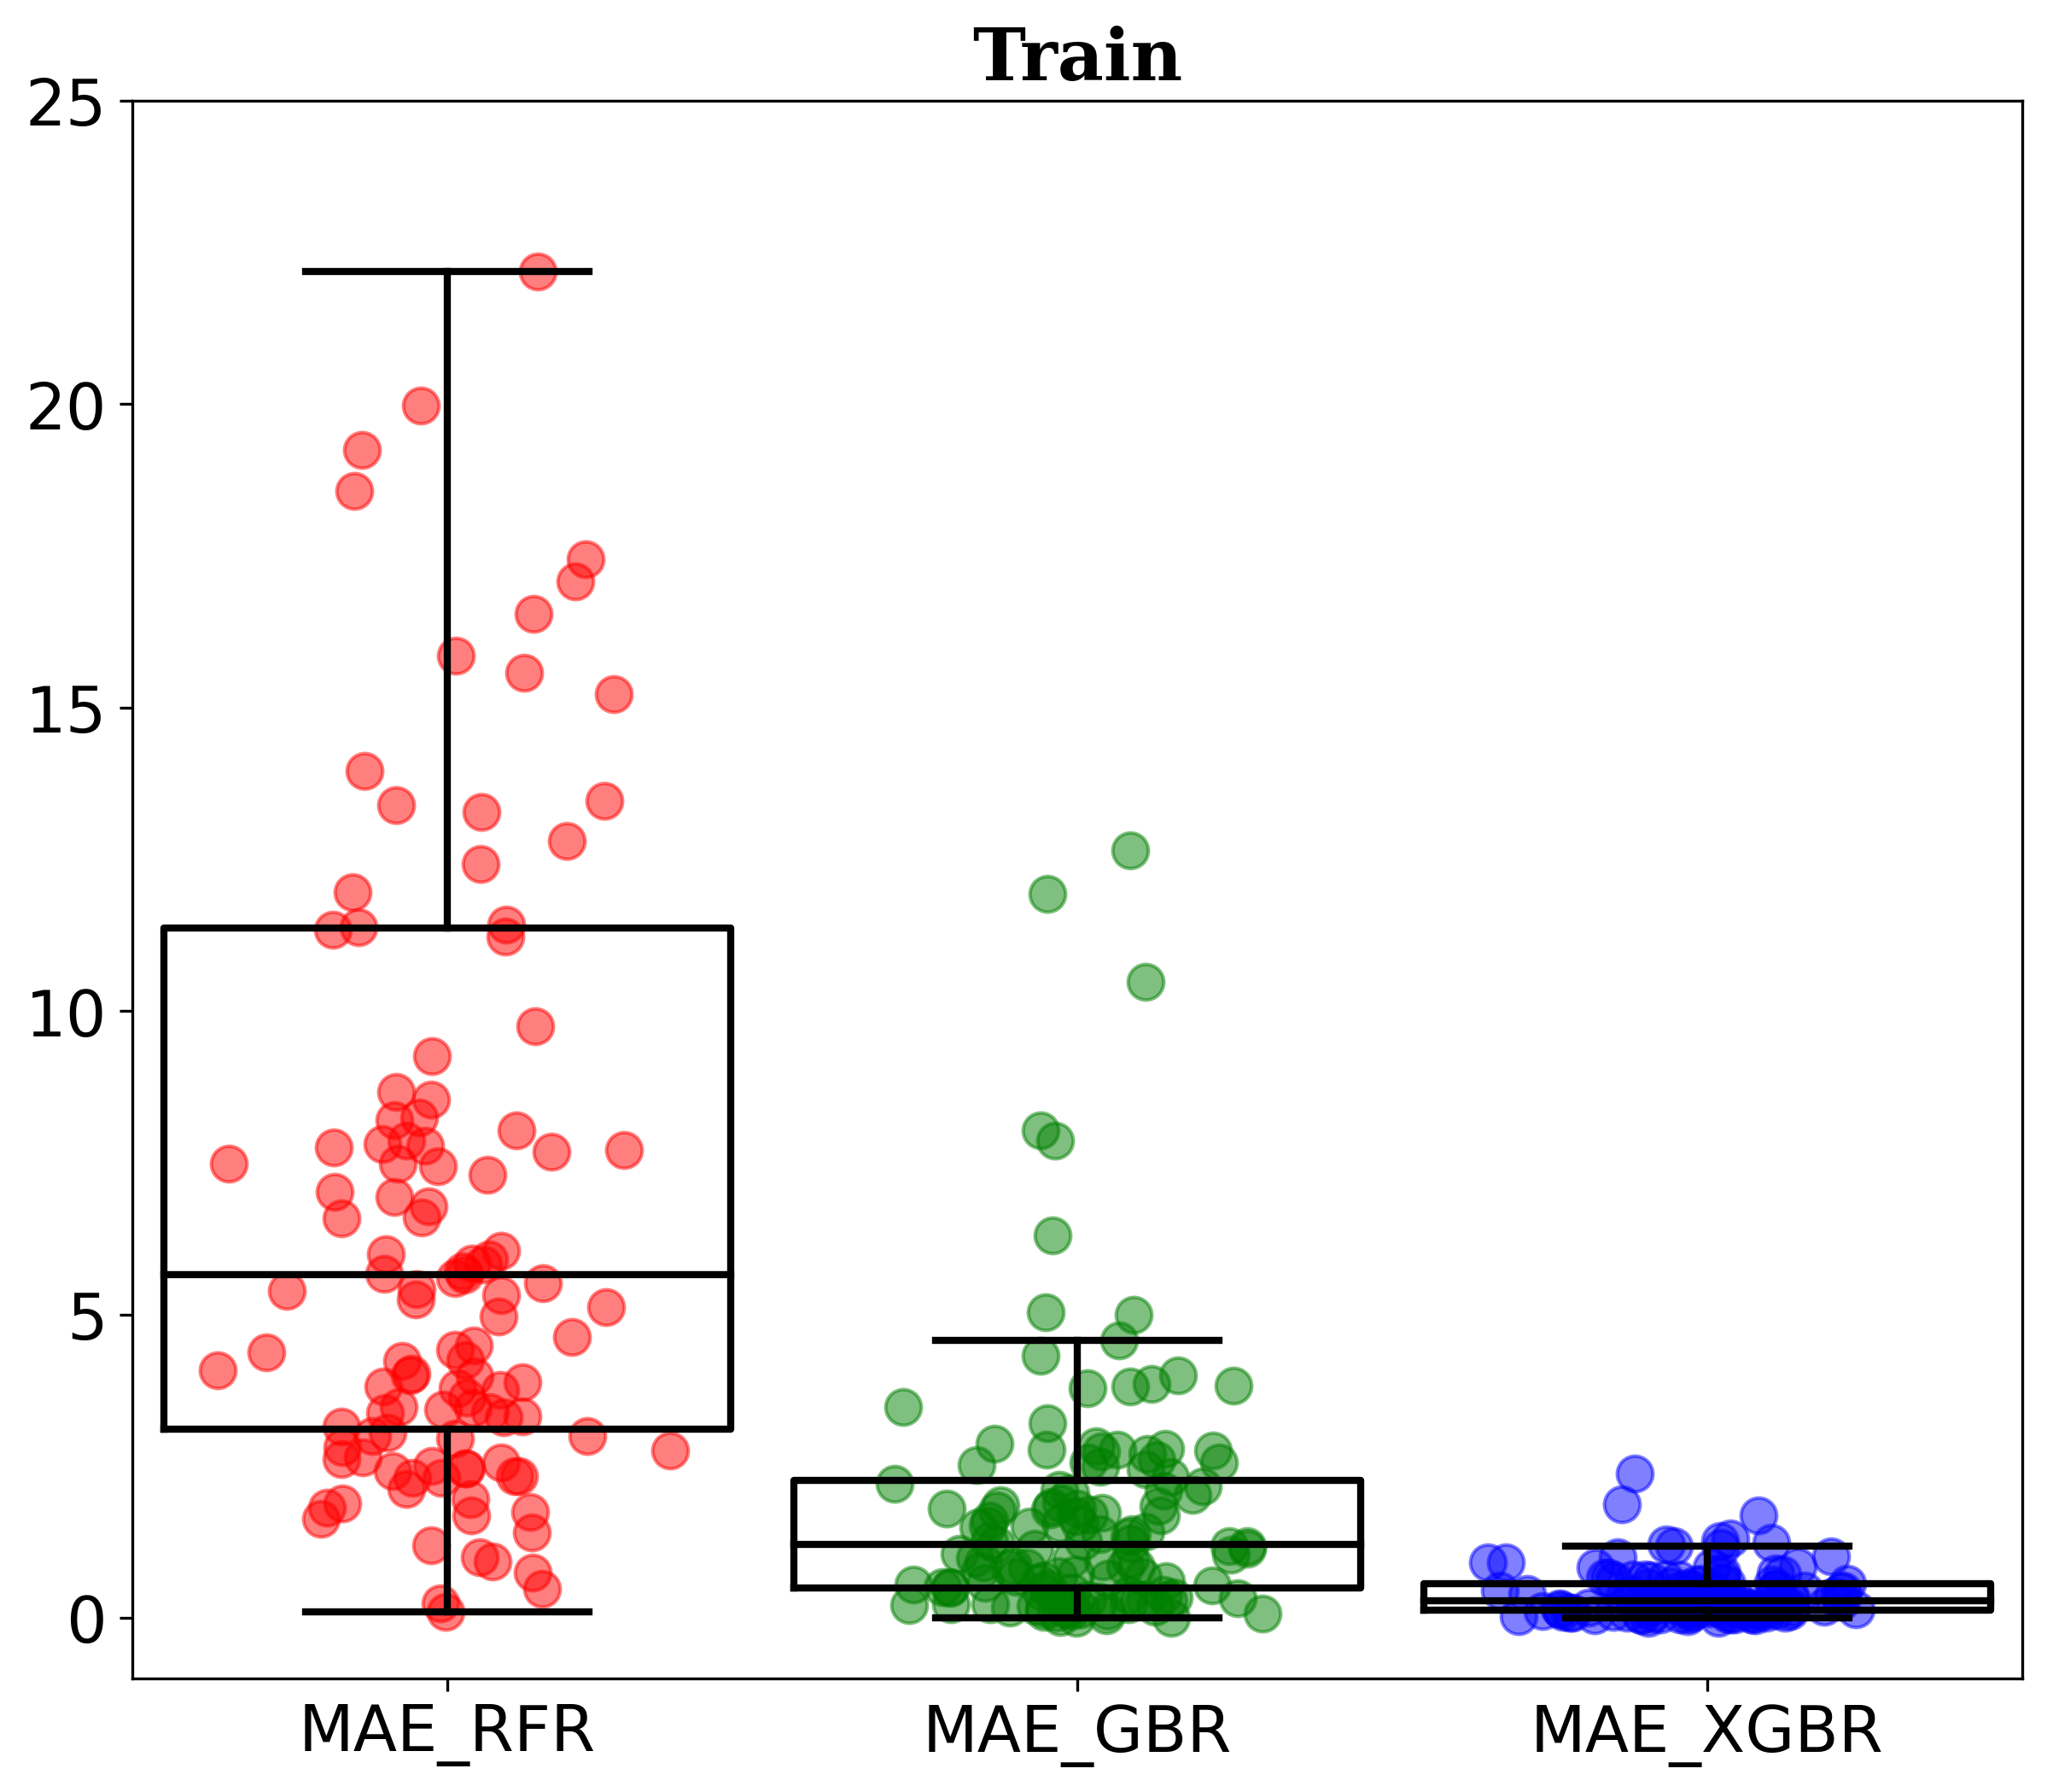

In [26]:
font1 = {'family':'serif','color':'black', 'size': '20'}
font2 = {'family':'serif','color':'black', 'size': '16'}

# Set the default text font size
plt.rc('font', size=18)
# Set the fig title font size
plt.rc('axes', titlesize=18)
# Set the axes labels font size
plt.rc('axes', labelsize=18)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=18)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=18)
# Set the legend font size
plt.rc('legend', fontsize=18)
# Set the font size of the figure title
plt.rc('figure', titlesize=18)


modelsNameTrain=['RFR', 'GBR - Train', 'XGBR - Train']
modelsNameTest=['RFR - Test', 'GBR - Test', 'XGBR - Test']


j=0
fig = plt.figure(figsize=(20,8), dpi=300)
gs  = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0.15, width_ratios=[1,1], height_ratios=[1])

vals, names, xs = [],[],[]
for i, col in enumerate(ERR_train.columns):
    vals.append(ERR_train[col].values)
    names.append(col)
    xs.append(np.random.normal(i +1,  0.12, ERR_train[col].values.shape[0]))
    
ax = fig.add_subplot(gs[0,0])
ax=plt.boxplot(vals, labels=names, widths=.9, meanline =True,
                showfliers = False,
                medianprops = {"color": "k", "linewidth": 2},
                boxprops = {"color": "k", "linewidth": 2},
                whiskerprops = {"color": "k", "linewidth": 2},
                capprops = {"color": "k", "linewidth": 2})

palette = ['r', 'g', 'b']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.5, color=c, s=100)
plt.axis([.5, 3.5, -1, 25])
plt.title('Train',fontweight='bold', fontdict=font1)



Text(0.5, 1.0, 'Test')

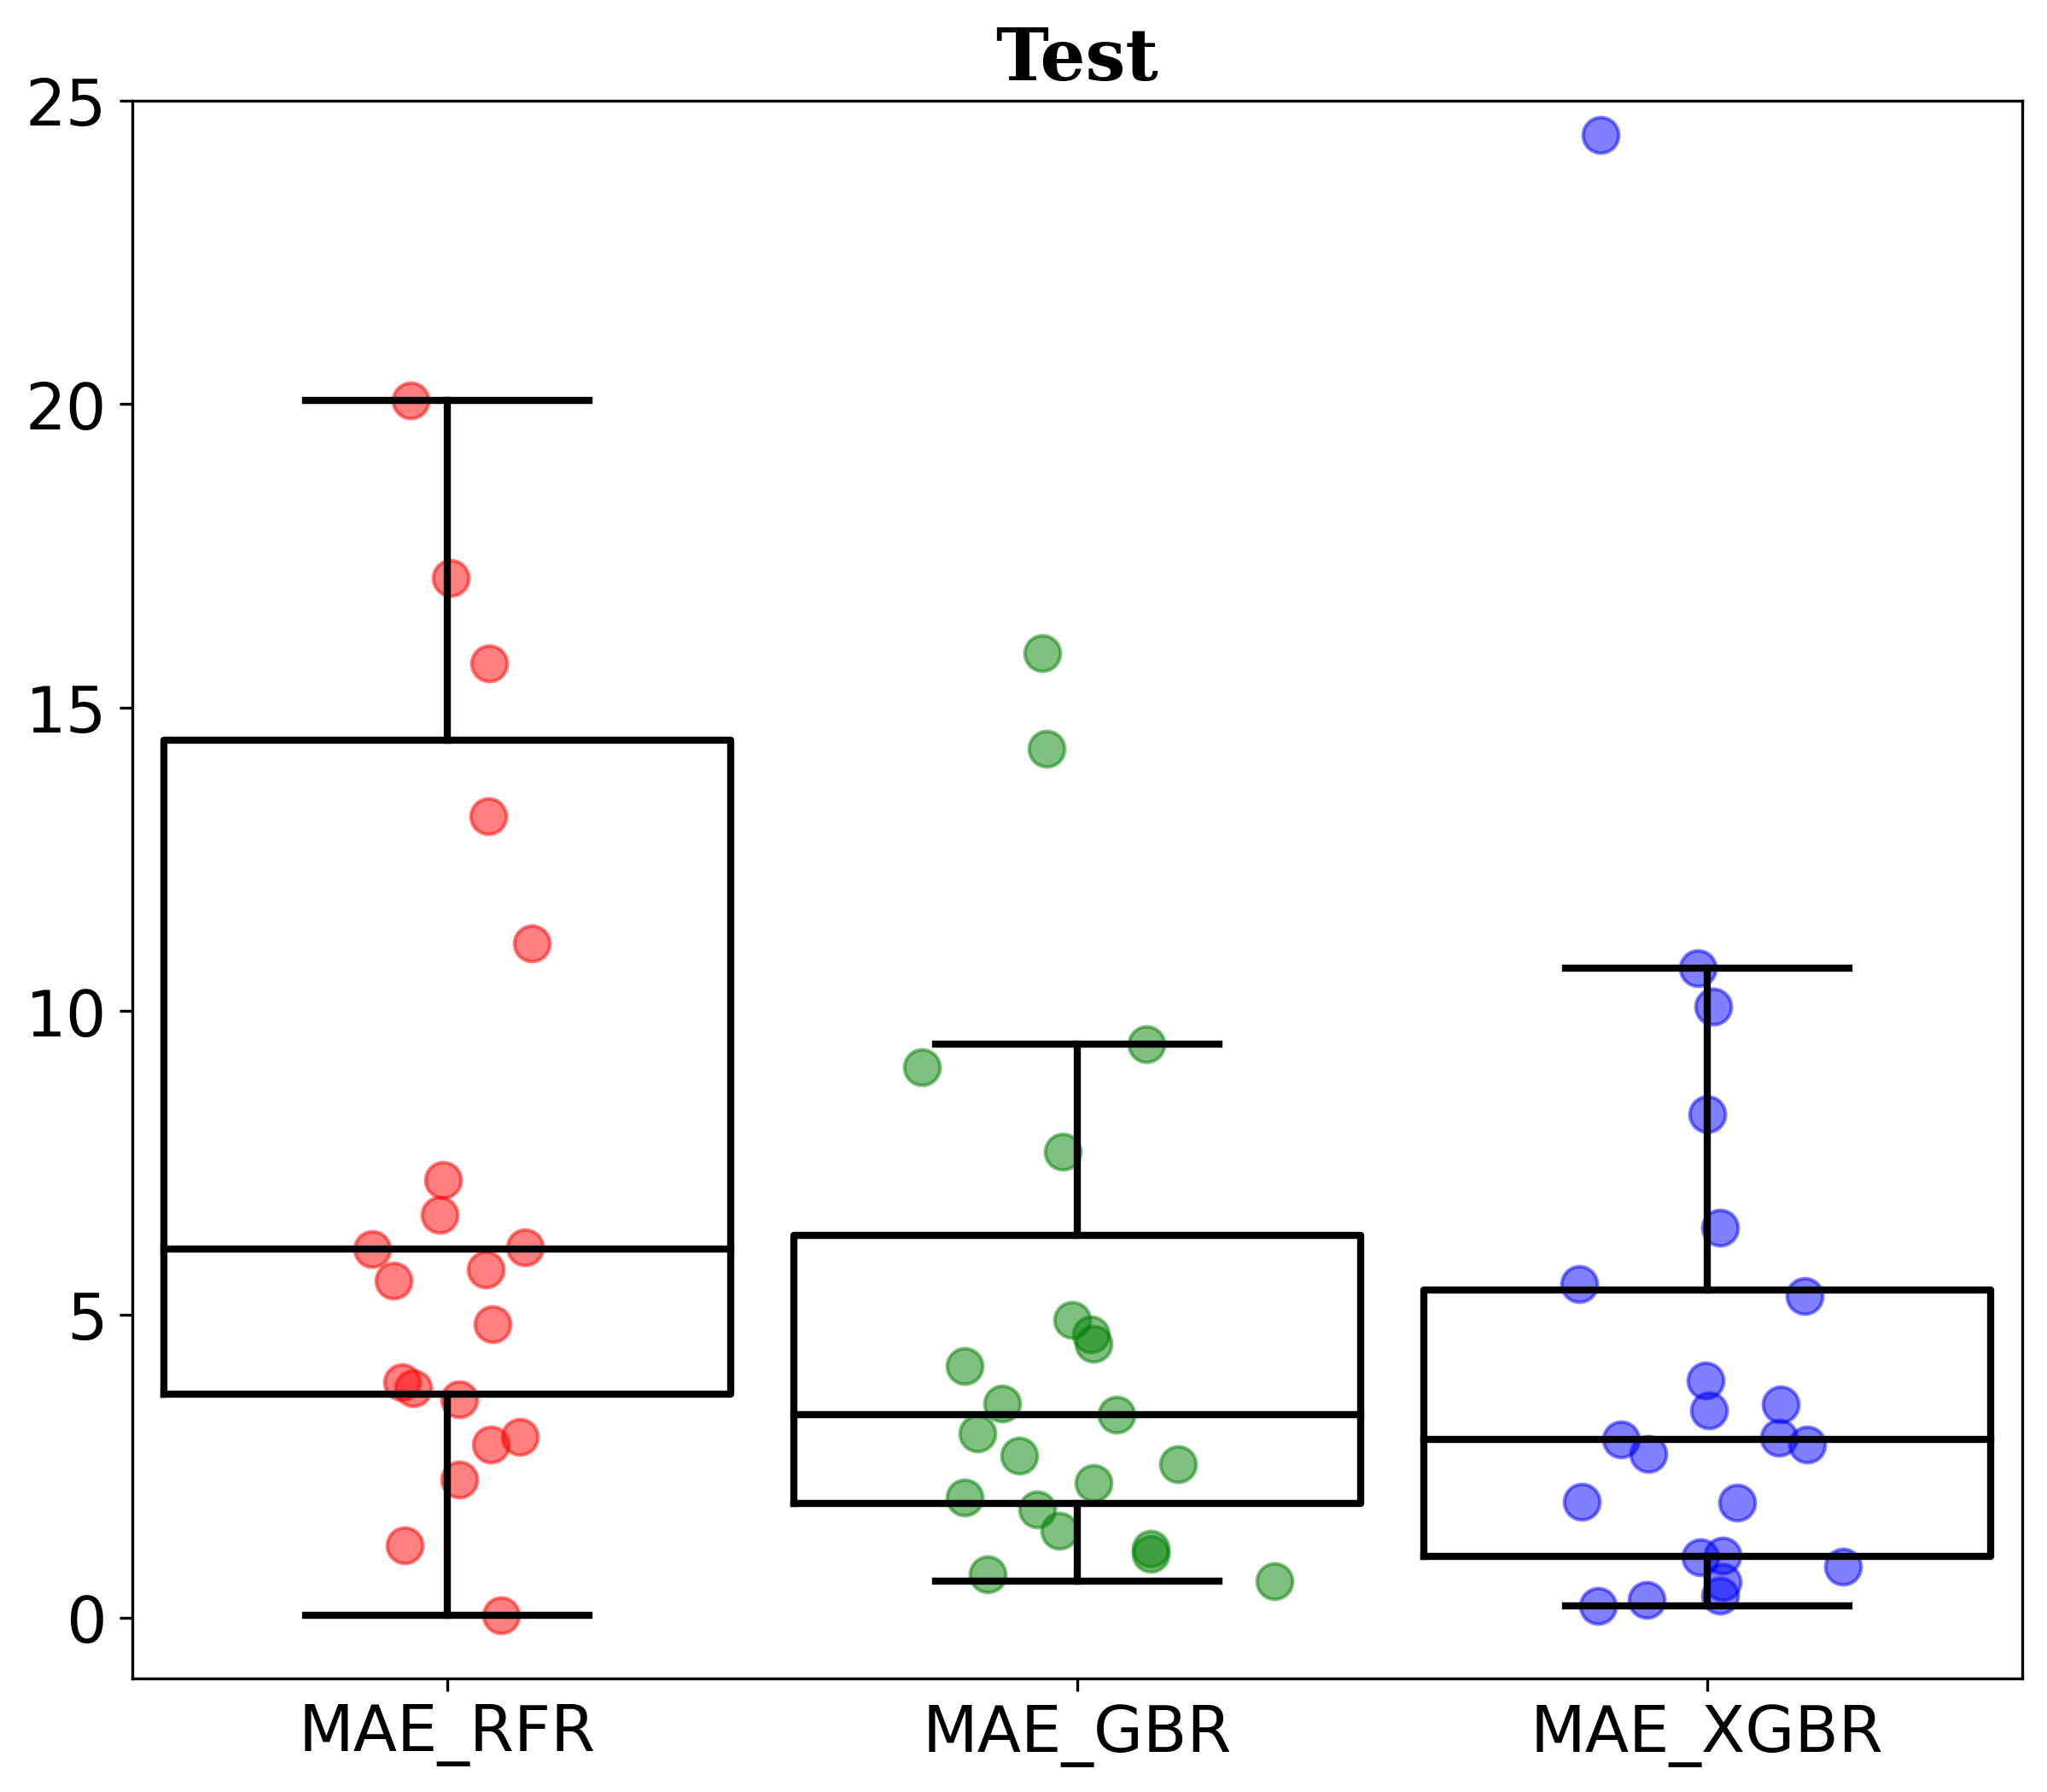

In [27]:
j=0
fig = plt.figure(figsize=(20,8), dpi=300)
gs  = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0.15, width_ratios=[1,1], height_ratios=[1])

vals, names, xs = [],[],[]
for i, col in enumerate(ERR_test.columns):
    vals.append(ERR_test[col].values)
    names.append(col)
    xs.append(np.random.normal(i +1,  0.12, ERR_test[col].values.shape[0]))
    
ax = fig.add_subplot(gs[0,0])
ax=plt.boxplot(vals, labels=names, widths=.9, meanline =True,
                showfliers = False,
                medianprops = {"color": "k", "linewidth": 2},
                boxprops = {"color": "k", "linewidth": 2},
                whiskerprops = {"color": "k", "linewidth": 2},
                capprops = {"color": "k", "linewidth": 2})

palette = ['r', 'g', 'b']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.5, color=c, s=100)
plt.axis([.5, 3.5, -1, 25])
plt.title('Test',fontweight='bold', fontdict=font1)



In [36]:
DRF_train=[DATA_train[['y_RFR', 'y_pred_RFR']], DATA_train[['y_GBR', 'y_pred_GBR']], DATA_train[['y_XGBR', 'y_pred_XGBR']]]
DRF_test=[DATA_test[['y_RFR', 'y_pred_RFR']], DATA_test[['y_GBR', 'y_pred_GBR']], DATA_test[['y_XGBR', 'y_pred_XGBR']]]

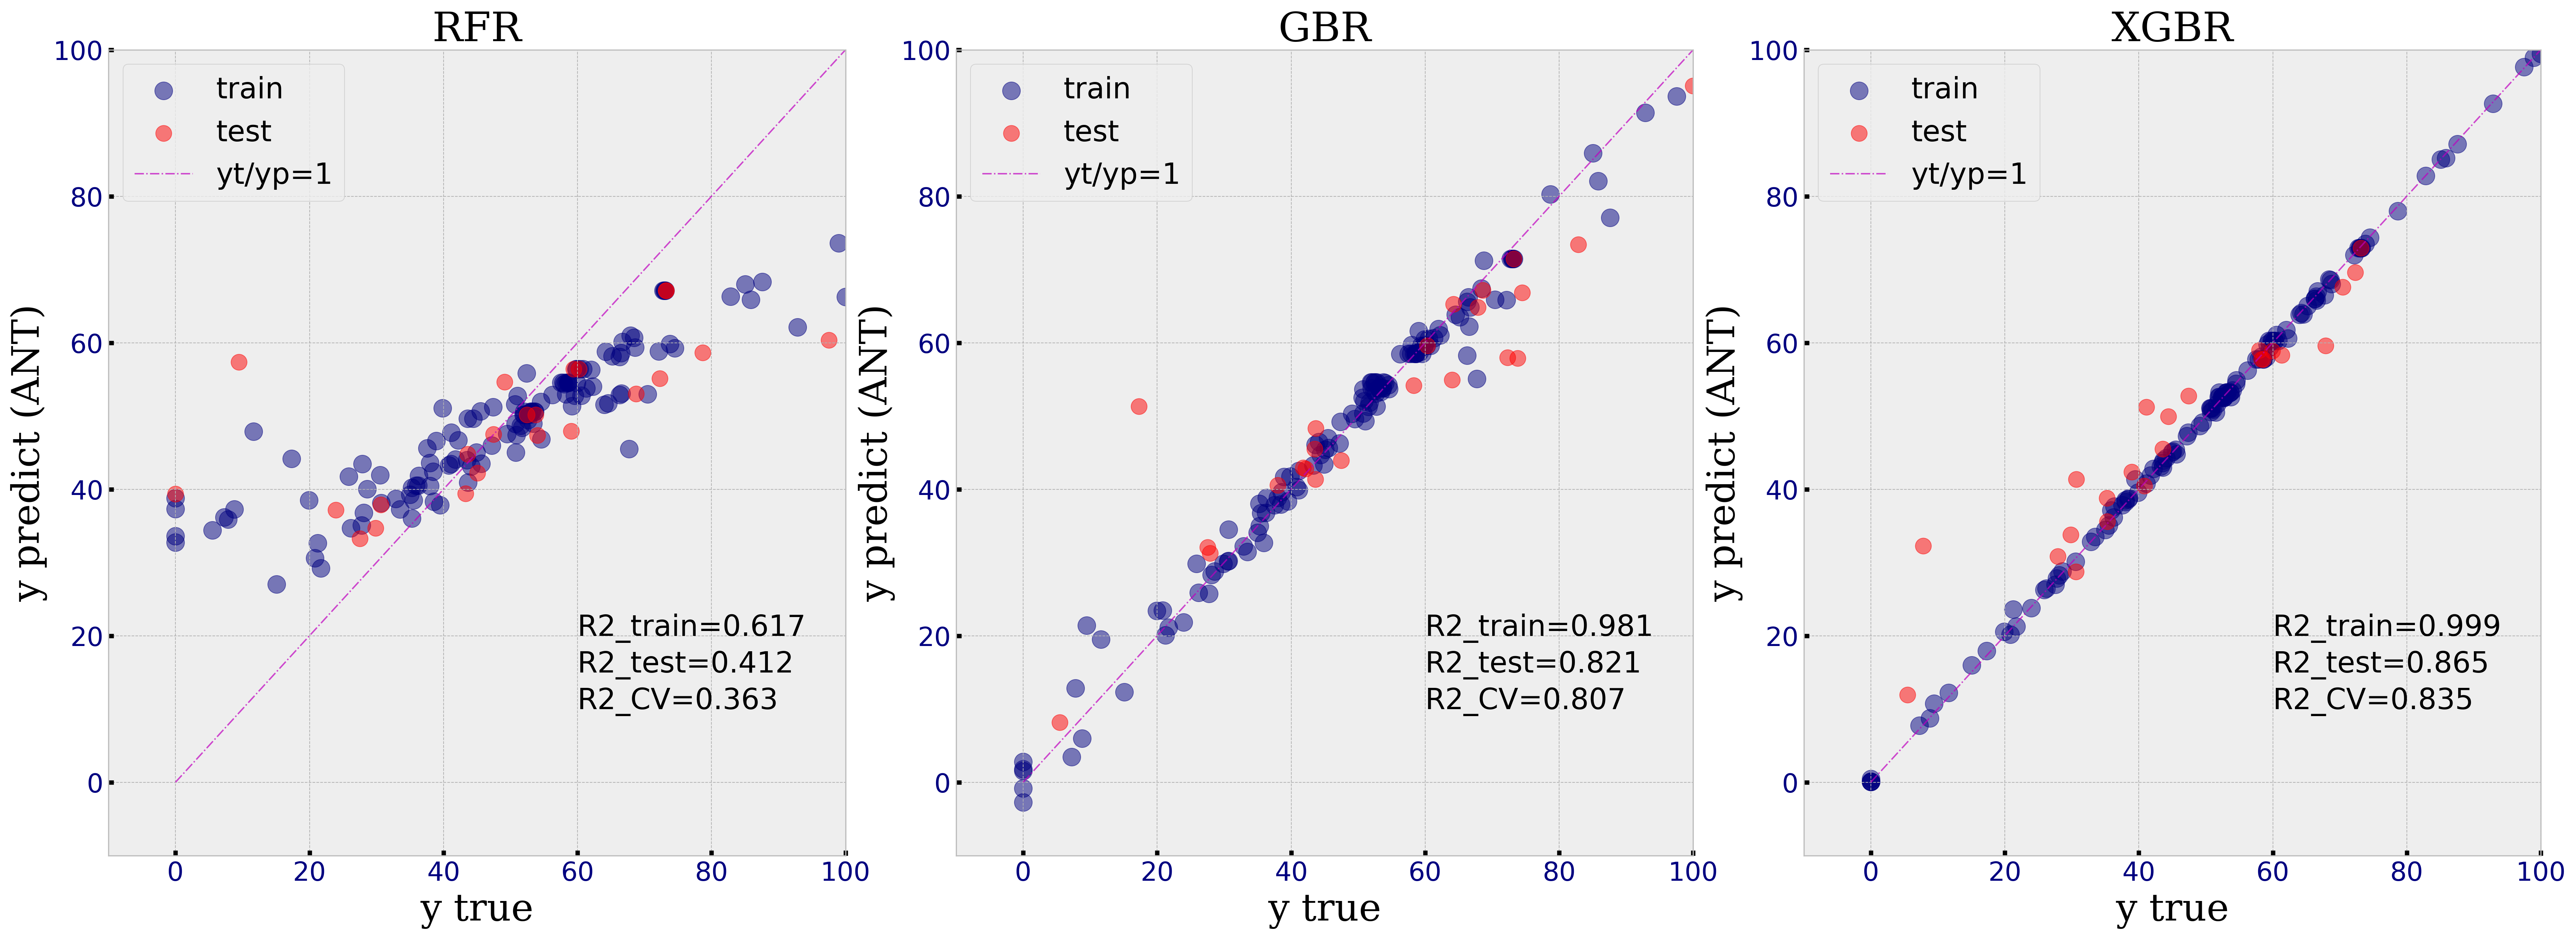

In [39]:
DRF_train=[DATA_train[['y_RFR', 'y_pred_RFR']], DATA_train[['y_GBR', 'y_pred_GBR']], DATA_train[['y_XGBR', 'y_pred_XGBR']]]
DRF_test=[DATA_test[['y_RFR', 'y_pred_RFR']], DATA_test[['y_GBR', 'y_pred_GBR']], DATA_test[['y_XGBR', 'y_pred_XGBR']]]

# Set the default text font size
plt.rc('font', size=18)
# Set the fig title font size
plt.rc('axes', titlesize=18)
# Set the axes labels font size
plt.rc('axes', labelsize=18)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=20)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=18)
# Set the legend font size
plt.rc('legend', fontsize=20)
# Set the font size of the figure title
plt.rc('figure', titlesize=18)



fig = plt.figure(figsize=(30,10), dpi=300)
gs  = gridspec.GridSpec(1, 3, wspace=0.15, hspace=0.15, width_ratios=[1, 1, 1], height_ratios=[1])
modelsName=['RFR', 'GBR', 'XGBR']


j=0
for DATA in DRF_train:
    DATA.columns=['y_true', 'y_first']
    DRF_test[j].columns = ['y_true', 'y_first']
    ax = fig.add_subplot(gs[0,j])
    ax.scatter(DATA['y_true'], DATA['y_first'], s=150, color='navy',label='train', alpha=0.5)
    ax.scatter(DRF_test[j]['y_true'], DRF_test[j]['y_first'], s=120, color='r',label='test', alpha=0.5)
    ax.plot([0, 350], [0, 350], 'k-.', lw=1, label='yt/yp=1', alpha=.7, color='m')
    
    plt.xlabel("y true", fontdict=font1, fontsize=26)
    plt.ylabel("y predict (ANT)", fontdict=font1, fontsize=26)
    ax.set_xlim([-10, 100])
    ax.set_ylim([-10, 100])
    ax.set_title(modelsName[j]  , loc= 'center', fontdict = font1, fontsize=28)
    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
    ax.tick_params(labelcolor='navy', labelsize='medium', width=3)
    ax.legend()
    
    R2TR=['R2_train=0.617','R2_train=0.981','R2_train=0.999']
    R2TE=['R2_test=0.412','R2_test=0.821','R2_test=0.865']
    CV5R2=['R2_CV=0.363','R2_CV=0.807','R2_CV=0.835']
    ax=plt.text(60, 20, R2TR[j], fontsize = 20)
    ax=plt.text(60, 15,  R2TE[j], fontsize = 20)
    ax=plt.text(60, 10,  CV5R2[j], fontsize = 20)
    j=j+1
